In [1]:
from opentisim import objects
from opentisim import defaults
from opentisim import system

# 0. Prepare inputs

In [2]:
startyear = 2019
lifecycle = 30

## 0.1 Generate demand forecast scenario

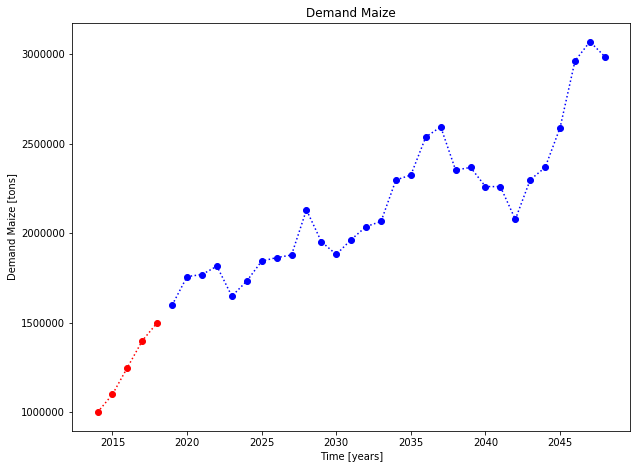

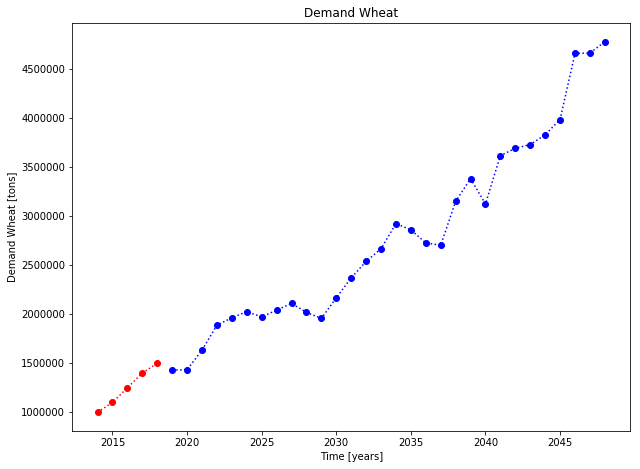

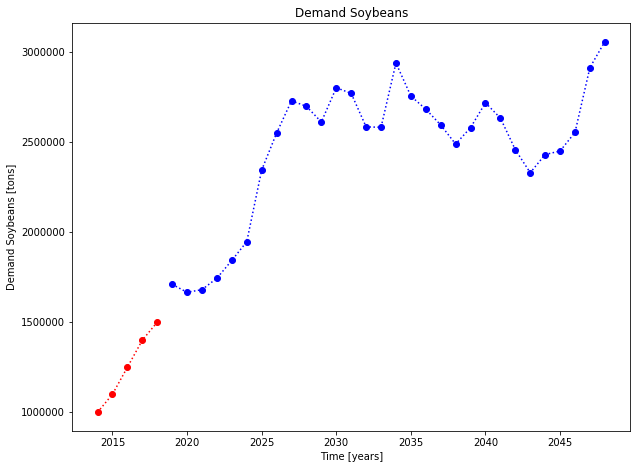

In [3]:
# instantiate a commodity object
maize = objects.Commodity(**defaults.maize_data)
wheat = objects.Commodity(**defaults.wheat_data)
soybeans = objects.Commodity(**defaults.soybean_data)

# create a future througput scenario
maize.scenario_random(startyear = startyear, lifecycle = lifecycle)
wheat.scenario_random(startyear = startyear, lifecycle = lifecycle)
soybeans.scenario_random(startyear = startyear, lifecycle = lifecycle)

demand = [maize, wheat, soybeans]

# plot scenarios 
if True:
    maize.plot_demand()
    wheat.plot_demand()
    soybeans.plot_demand()

In [4]:
maize.handling_fee = 3
soybeans.handling_fee = 3
wheat.handling_fee = 3

## 0.2 Generate vessels

In [5]:
# instantiate vessels
handysize = objects.Vessel(**defaults.handysize_data)
handymax = objects.Vessel(**defaults.handymax_data)
panamax = objects.Vessel(**defaults.panamax_data)

vessels = [handysize, handymax, panamax]

# 1. Instatiate terminal system

In [6]:
Terminal = system.System(startyear = startyear, lifecycle = lifecycle, elements = demand + vessels, debug=False,
                         crane_type_defaults=defaults.mobile_crane_data, storage_type_defaults=defaults.silo_data)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [7]:
Terminal.simulate()

PV: [-6.80494600e+07 -1.34136640e+08 -3.50462179e+07 -1.51183132e+07
  2.30128644e+06 -2.38349749e+06 -1.08726799e+07 -2.96686752e+07
 -1.40419270e+07 -2.61161400e+06  1.45916952e+06  2.34315854e+06
 -9.63486643e+06 -1.50306828e+07  1.80498372e+06 -2.65847660e+07
 -2.92863425e+07  1.25660768e+06  1.09221068e+06  1.35008946e+06
  2.55568657e+05  1.56683189e+06 -2.66277121e+06  1.53189118e+06
  1.86175567e+06  2.09885816e+06 -1.43586028e+07 -4.45586761e+07
 -5.08833645e+07 -2.80277192e+07]
NPV: -514034404.7417059


## Report all elements

In [8]:
if Terminal.debug:
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)

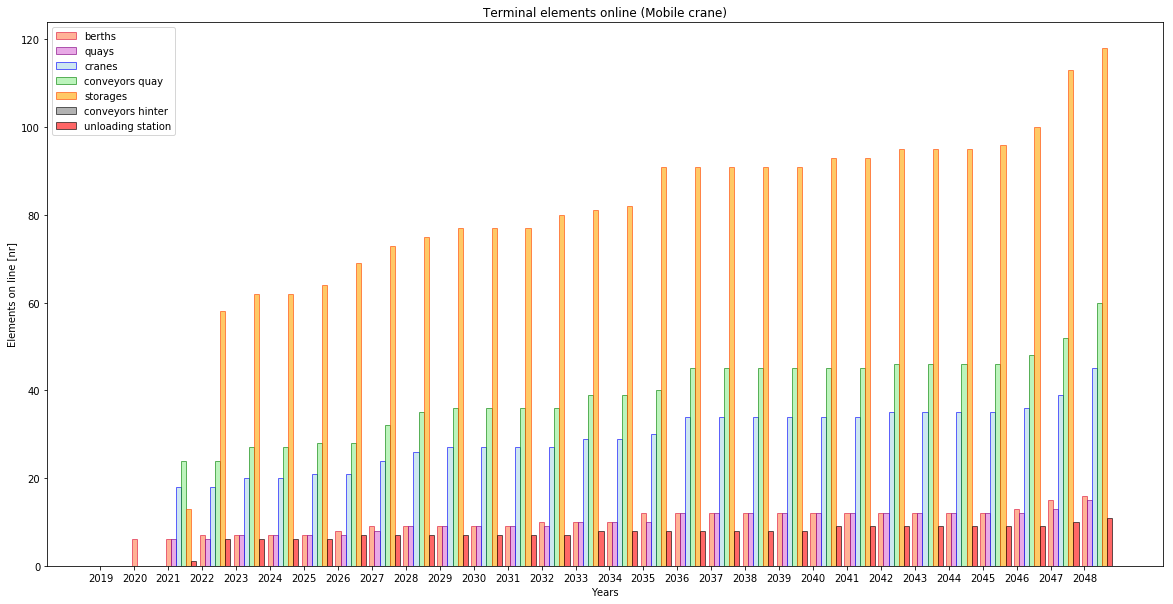

In [9]:
Terminal.terminal_elements_plot()

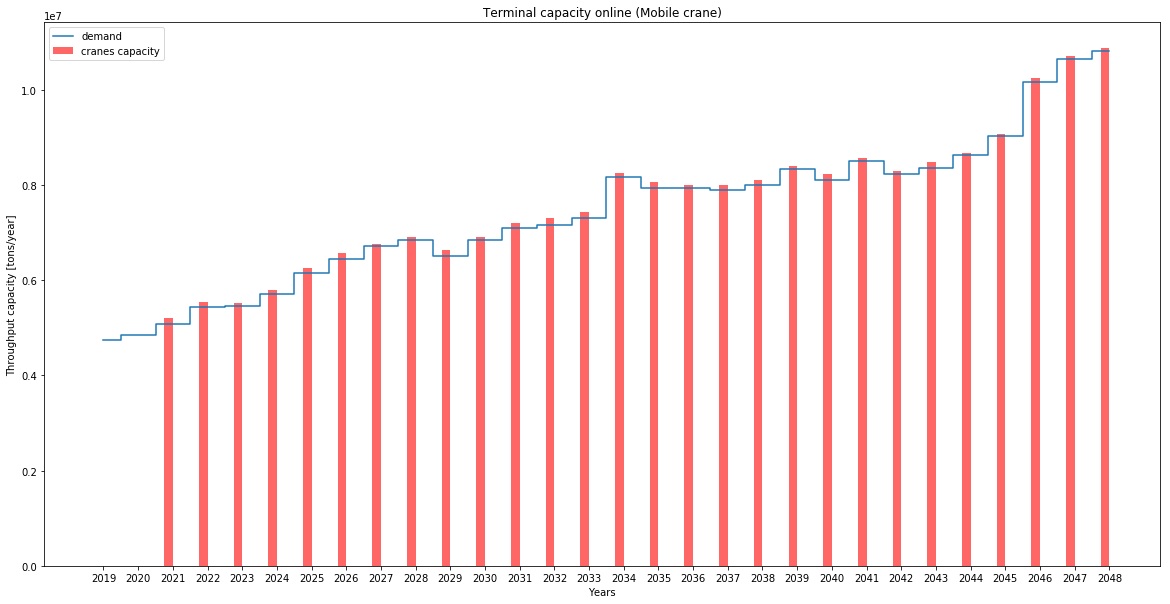

In [10]:
Terminal.terminal_capacity_plot()

In [11]:
# add cash flow information for each of the Terminal elements
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

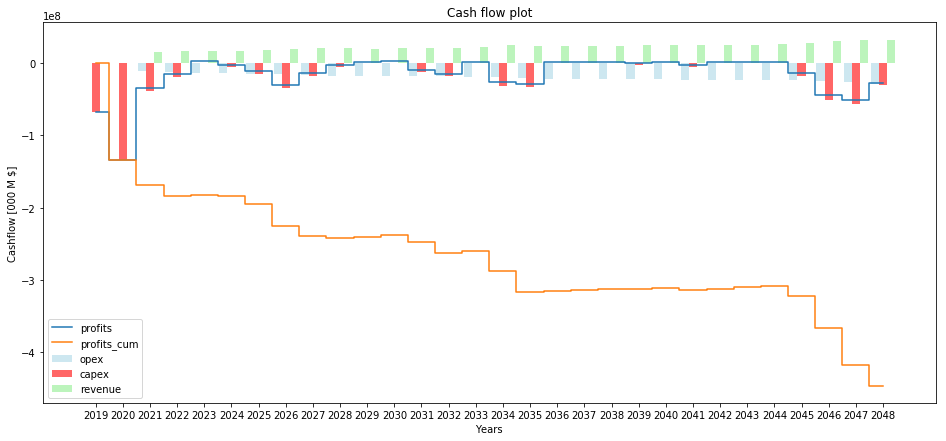

In [12]:
Terminal.cashflow_plot(cash_flows)

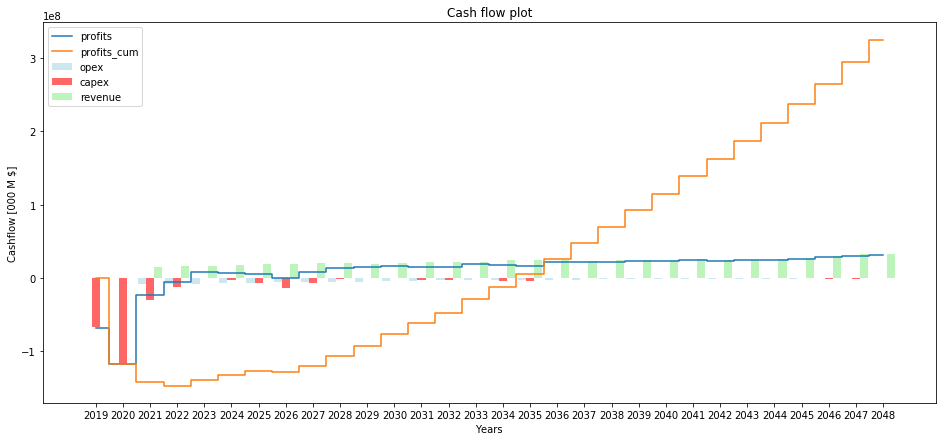

In [13]:
Terminal.cashflow_plot(cash_flows_WACC_real)

## SandBox

In [14]:
Terminal.NPV()

PV: [-6.80494600e+07 -1.34136640e+08 -3.50462179e+07 -1.51183132e+07
  2.30128644e+06 -2.38349749e+06 -1.08726799e+07 -2.96686752e+07
 -1.40419270e+07 -2.61161400e+06  1.45916952e+06  2.34315854e+06
 -9.63486643e+06 -1.50306828e+07  1.80498372e+06 -2.65847660e+07
 -2.92863425e+07  1.25660768e+06  1.09221068e+06  1.35008946e+06
  2.55568657e+05  1.56683189e+06 -2.66277121e+06  1.53189118e+06
  1.86175567e+06  2.09885816e+06 -1.43586028e+07 -4.45586761e+07
 -5.08833645e+07 -2.80277192e+07]
NPV: -514034404.7417059
